## Predicting Titanic Survival Using Logistic Regression

In [54]:
# Imports
import numpy as np
import pandas as pd
import re
import csv

from logistic_regression import *

In [55]:
# Setting Up Variables
training_data = []

# Opening CSV Data using csv Python library
with open('titanic_training_data.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)

    for row in reader:
        training_data.append(row)

# Converting to Pandas DataFrame
training_data = np.array(training_data)
training_dataframe = pd.DataFrame(training_data[1:, :], columns = training_data[0, :], index = training_data[1:, 0])

display(training_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.45,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


## Data Exploration

In [56]:
training_dataframe.info()

training_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: object(12)
memory usage: 90.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,891,2,3,891,2,89,7,7,681,248,148,4
top,1,0,3,"Braund, Mr. Owen Harris",male,,0,0,347082,8.05,,S
freq,1,549,491,1,577,177,608,678,7,43,687,644


In [57]:
# Removing Unneeded Columns
training_dataframe = training_dataframe.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)

# One - Hot Encoding
training_dataframe = pd.get_dummies(data = training_dataframe, columns = ["Sex", "Pclass"])

# Moving Output Column to the End of the Python Pandas Dataframe
survived = training_dataframe.pop("Survived")
training_dataframe.insert(len(training_dataframe.columns), "Survived", survived)

# Converting Type to Float
training_dataframe = training_dataframe.apply(pd.to_numeric)

# Imputing NaN (Missing Values) with mean of the column
mean = training_dataframe.mean()

# fill NaN values with the mean of each column
training_dataframe.fillna(mean, inplace=True)

display(training_dataframe)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Survived
1,22.000000,1,0,7.2500,0,1,0,0,1,0
2,38.000000,1,0,71.2833,1,0,1,0,0,1
3,26.000000,0,0,7.9250,1,0,0,0,1,1
4,35.000000,1,0,53.1000,1,0,1,0,0,1
5,35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,0,1,0,1,0,0
888,19.000000,0,0,30.0000,1,0,1,0,0,1
889,29.699118,1,2,23.4500,1,0,0,0,1,0
890,26.000000,0,0,30.0000,0,1,1,0,0,1


In [58]:
training_data = training_dataframe.to_numpy()
training_data = training_data.astype(float)

training_columns = training_dataframe.columns.values

print(training_columns)
print(training_data)

['Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male' 'Pclass_1'
 'Pclass_2' 'Pclass_3' 'Survived']
[[22.          1.          0.         ...  0.          1.
   0.        ]
 [38.          1.          0.         ...  0.          0.
   1.        ]
 [26.          0.          0.         ...  0.          1.
   1.        ]
 ...
 [29.69911765  1.          2.         ...  0.          1.
   0.        ]
 [26.          0.          0.         ...  0.          0.
   1.        ]
 [32.          0.          0.         ...  0.          1.
   0.        ]]


In [59]:
num_columns = len(training_columns)
num_rows = len(training_data)

print("Number of Columns: " + str(num_columns))
print("Number of Rows: " + str(num_rows))

Number of Columns: 10
Number of Rows: 891


In [60]:
start_w = np.zeros(num_columns - 1)
start_b = 0

print("Number of w parameters: ")
print(start_w.size)

Number of w parameters: 
9


In [61]:
(w, b, tracking_cost) = gradient_descent(training_data, start_w, start_b, 0.002, 20000)

print(w)
print(b)

891 891
[-0.02052669 -0.29310788 -0.08858625  0.00780218  1.35000671 -1.08380367
  0.61372544  0.26768605 -0.61520844]
0.26620304326071687


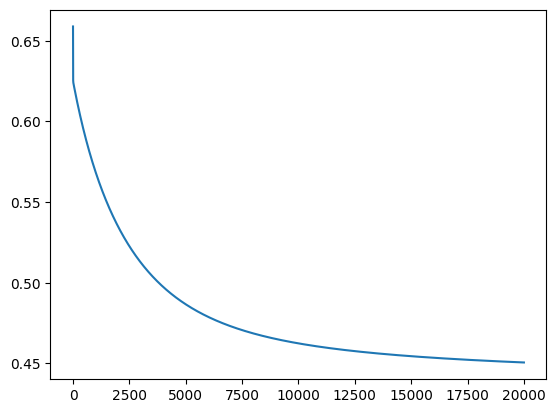

In [62]:
import matplotlib.pyplot as plt 

plt.plot(tracking_cost)

## Running Model on Test Data

In [63]:
# Setting Up Variables
test_data = []

# Opening CSV Data using csv Python library
with open('titanic_test_data.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)

    for row in reader:
        test_data.append(row)

# Converting to Pandas DataFrame
test_data = np.array(test_data)
test_dataframe = pd.DataFrame(test_data[1:, :], columns = test_data[0, :], index = test_data[1:, 0])

ids = test_dataframe["PassengerId"]

display(test_dataframe)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q
895,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S
896,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.05,,S
1306,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C
1307,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1308,1308,3,"Ware, Mr. Frederick",male,,0,0,359309,8.05,,S


In [64]:
# Removing Unneeded Columns
test_dataframe = test_dataframe.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)

# One - Hot Encoding
test_dataframe = pd.get_dummies(data = test_dataframe, columns = ["Sex", "Pclass"])

# Converting Type to Float
test_dataframe = test_dataframe.apply(pd.to_numeric)

# Imputing NaN (Missing Values) with mean of the column
mean = test_dataframe.mean()

# fill NaN values with the mean of each column
test_dataframe.fillna(mean, inplace=True)

display(test_dataframe)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
892,34.50000,0,0,7.8292,0,1,0,0,1
893,47.00000,1,0,7.0000,1,0,0,0,1
894,62.00000,0,0,9.6875,0,1,0,1,0
895,27.00000,0,0,8.6625,0,1,0,0,1
896,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,30.27259,0,0,8.0500,0,1,0,0,1
1306,39.00000,0,0,108.9000,1,0,1,0,0
1307,38.50000,0,0,7.2500,0,1,0,0,1
1308,30.27259,0,0,8.0500,0,1,0,0,1


In [65]:
test_data = test_dataframe.to_numpy()
test_data = test_data.astype(float)

test_columns = test_dataframe.columns.values

print(test_columns)
print(test_data)

['Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male' 'Pclass_1'
 'Pclass_2' 'Pclass_3']
[[34.5         0.          0.         ...  0.          0.
   1.        ]
 [47.          1.          0.         ...  0.          0.
   1.        ]
 [62.          0.          0.         ...  0.          1.
   0.        ]
 ...
 [38.5         0.          0.         ...  0.          0.
   1.        ]
 [30.27259036  0.          0.         ...  0.          0.
   1.        ]
 [30.27259036  1.          1.         ...  0.          0.
   1.        ]]


In [66]:
num_columns = len(test_columns)
num_rows = len(test_data)

print("Number of Columns: " + str(num_columns))
print("Number of Rows: " + str(num_rows))

Number of Columns: 9
Number of Rows: 418


In [67]:
predictions = []

for sample in test_data:
    temp = model_estimate(sample, w, b)

    if temp > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

ids = ids.to_numpy()
predictions = np.array(predictions)

output = np.column_stack((ids, predictions))
print(output)

output = pd.DataFrame(output, columns = ["PassengerId", "Survived"])
output.to_csv("titanic_predictions.csv", index = False)

[['892' 0]
 ['893' 0]
 ['894' 0]
 ['895' 0]
 ['896' 1]
 ['897' 0]
 ['898' 1]
 ['899' 0]
 ['900' 1]
 ['901' 0]
 ['902' 0]
 ['903' 0]
 ['904' 1]
 ['905' 0]
 ['906' 1]
 ['907' 1]
 ['908' 0]
 ['909' 0]
 ['910' 1]
 ['911' 1]
 ['912' 0]
 ['913' 0]
 ['914' 1]
 ['915' 0]
 ['916' 1]
 ['917' 0]
 ['918' 1]
 ['919' 0]
 ['920' 0]
 ['921' 0]
 ['922' 0]
 ['923' 0]
 ['924' 1]
 ['925' 1]
 ['926' 0]
 ['927' 0]
 ['928' 1]
 ['929' 1]
 ['930' 0]
 ['931' 0]
 ['932' 0]
 ['933' 0]
 ['934' 0]
 ['935' 1]
 ['936' 1]
 ['937' 0]
 ['938' 0]
 ['939' 0]
 ['940' 1]
 ['941' 1]
 ['942' 0]
 ['943' 0]
 ['944' 1]
 ['945' 1]
 ['946' 0]
 ['947' 0]
 ['948' 0]
 ['949' 0]
 ['950' 0]
 ['951' 1]
 ['952' 0]
 ['953' 0]
 ['954' 0]
 ['955' 1]
 ['956' 1]
 ['957' 1]
 ['958' 1]
 ['959' 0]
 ['960' 0]
 ['961' 1]
 ['962' 1]
 ['963' 0]
 ['964' 1]
 ['965' 0]
 ['966' 1]
 ['967' 1]
 ['968' 0]
 ['969' 1]
 ['970' 0]
 ['971' 1]
 ['972' 0]
 ['973' 0]
 ['974' 0]
 ['975' 0]
 ['976' 0]
 ['977' 0]
 ['978' 1]
 ['979' 1]
 ['980' 1]
 ['981' 0]
 ['982' 1]

In [68]:
# test_error = cost_function(test_data[0:-1], w, b)
# print("Error on Test Data: " + str(test_error))